In [1]:
import sys
sys.path.append('../src')
%matplotlib widget

In [11]:
import os
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = "2023-05-15_mlati7_output"
filepath = "../scripts/" + filename + ".nwb"
filename_prefix = f"../graphs/{filename}"
if not os.path.exists(filename_prefix):
    os.makedirs(filename_prefix)

nwbio = NWBHDF5IO(filepath)
nwb = nwbio.read()

probe_trial_idxs = nwb.processing["behavior"]["unit-trial-probe"].data[:]
saccade_trial_idxs = nwb.processing["behavior"]["unit-trial-saccade"].data[:]
mixed_trial_idxs = nwb.processing["behavior"]["unit-trial-mixed"].data[:]

# Filter out mixed trials that saccades are more than 20ms away from the probe
mixed_rel_timestamps = nwb.processing["behavior"]["mixed-trial-saccade-relative-timestamps"].data[:]
mixed_filtered_idxs = np.abs(mixed_rel_timestamps) <= 0.02  # 20 ms
mixed_trial_idxs = mixed_trial_idxs[mixed_filtered_idxs]

# (units, trials, t)
probe_units = nwb.units["trial_response_firing_rates"].data[:, probe_trial_idxs]
saccade_units = nwb.units["trial_response_firing_rates"].data[:, saccade_trial_idxs]
mixed_units = nwb.units["trial_response_firing_rates"].data[:, mixed_trial_idxs]
rp_peri_units = nwb.units["r_p_peri_trials"].data[:]


In [5]:
dataset1 = rp_peri_units  # (units, trials, t)
dataset2 = probe_units

In [93]:
avg1 = np.mean(dataset1, axis=1)  # avg along trials axis
avg2 = np.mean(dataset2, axis=1)  # (units, t)
avg1_sums = np.sum(avg1, axis=1)
savg1 = sorted(avg1, key=lambda x: np.sum(x))
savg1 = np.array(savg1)

avg1 = savg1

In [102]:
def do_sort(arr):
    sums = np.sum(arr, axis=0)
    for i in range(len(arr)):
        pass

array([2, 1, 3])

(35, 327, 327)

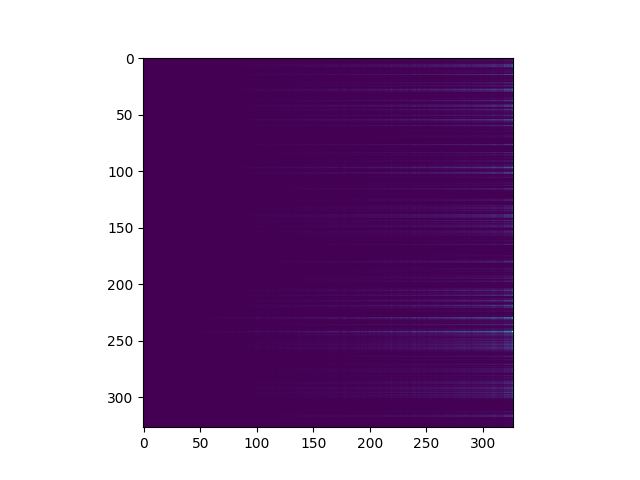

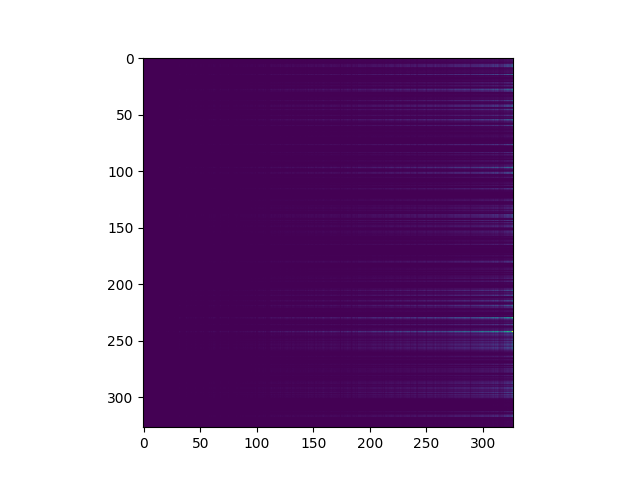

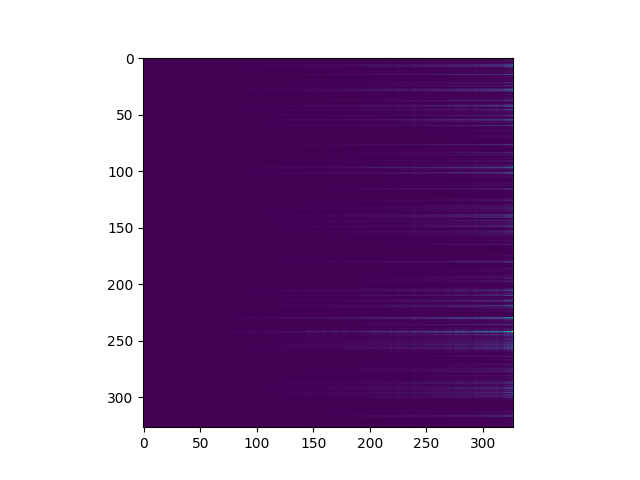

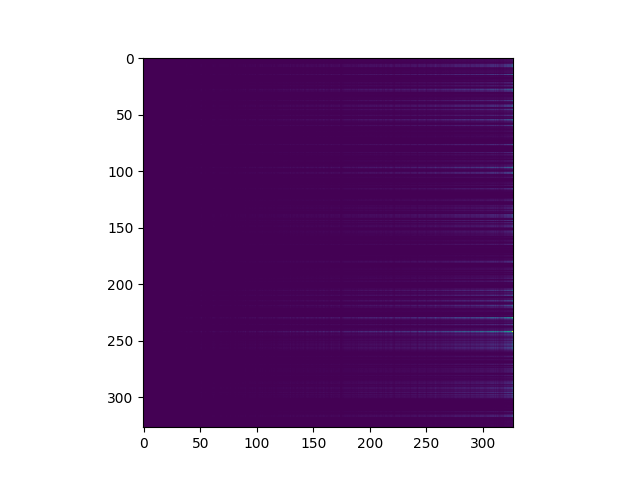

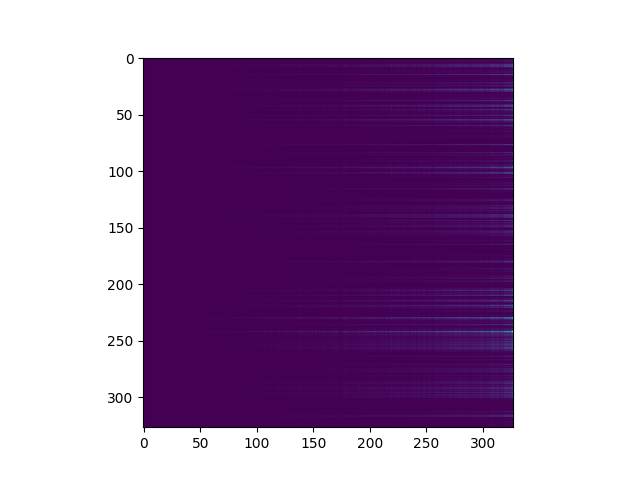

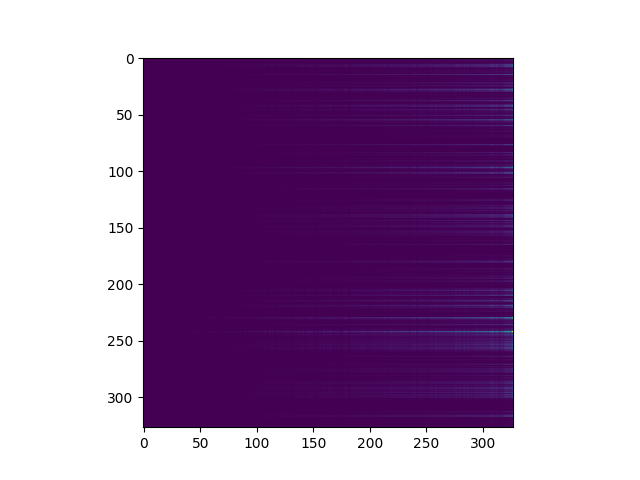

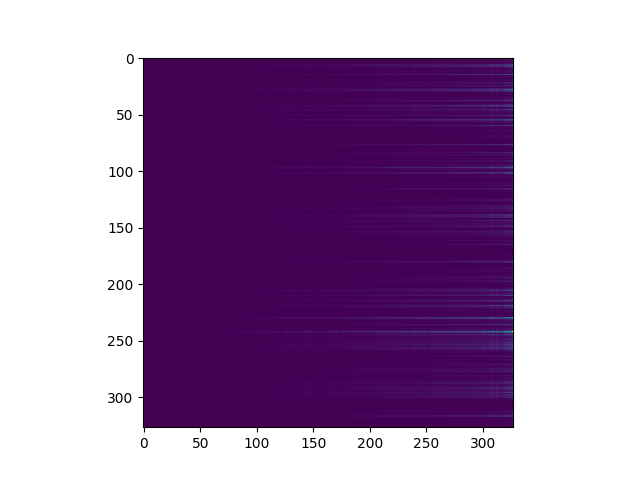

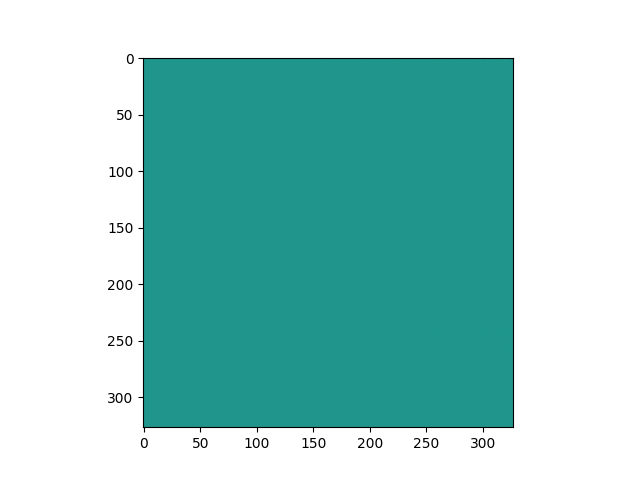

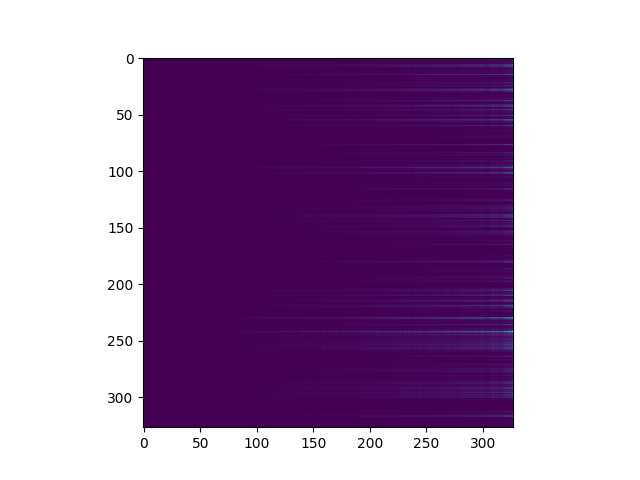

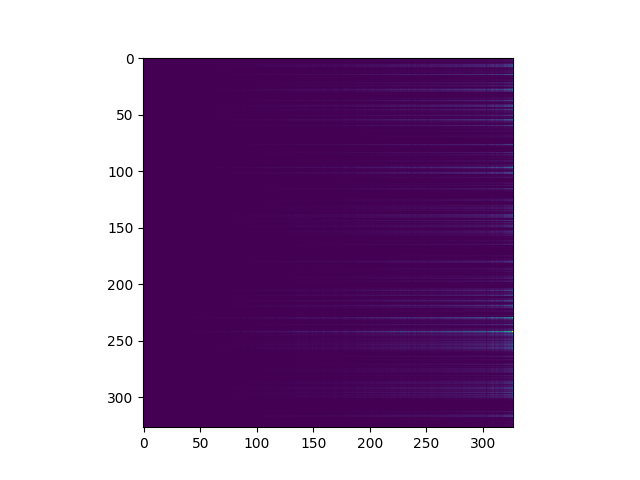

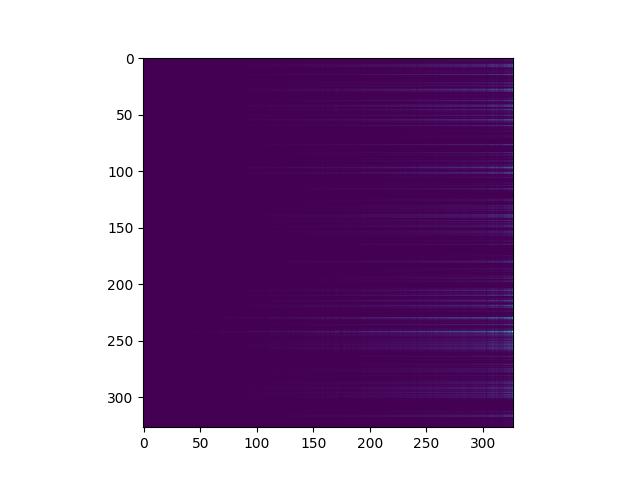

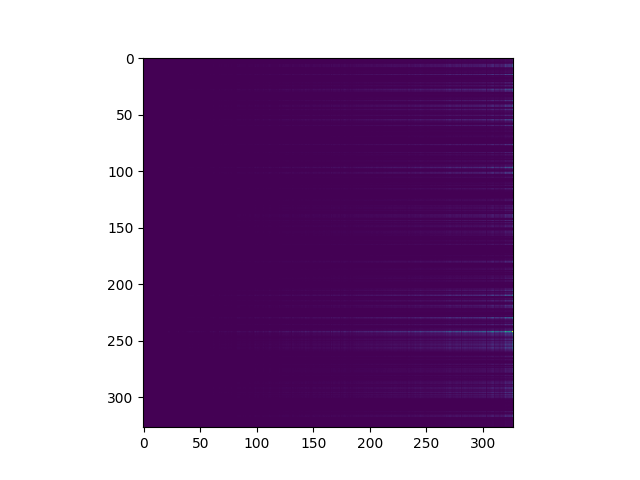

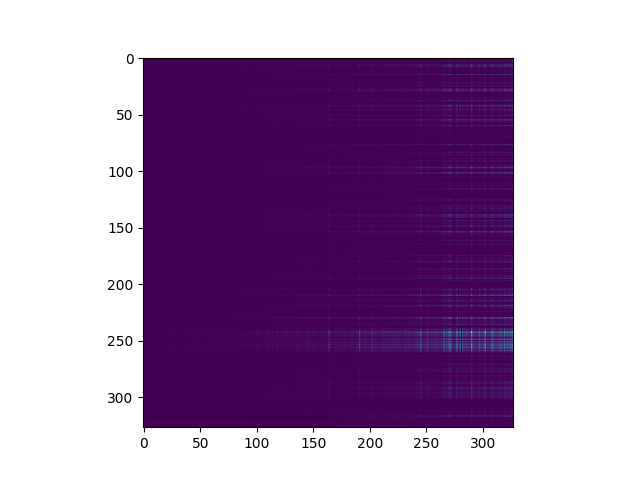

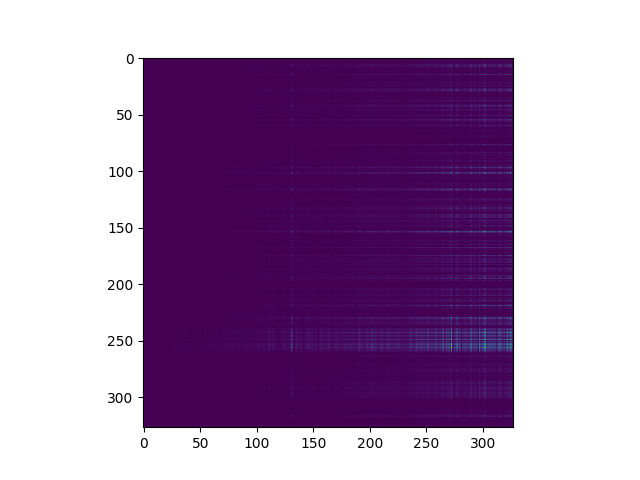

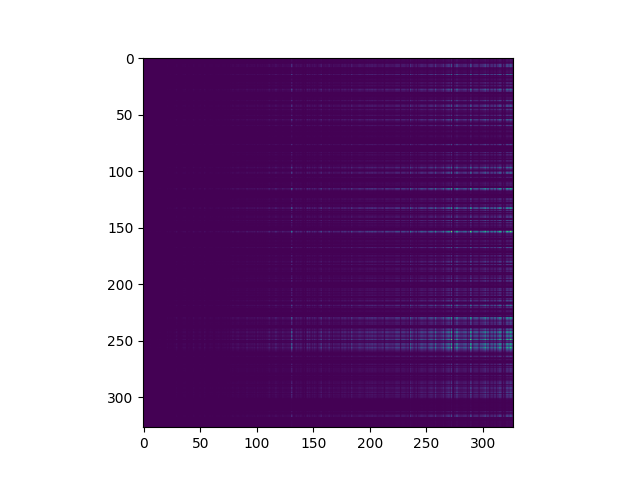

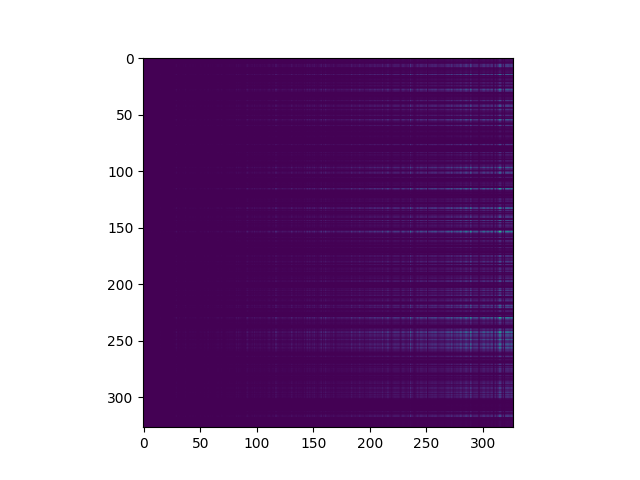

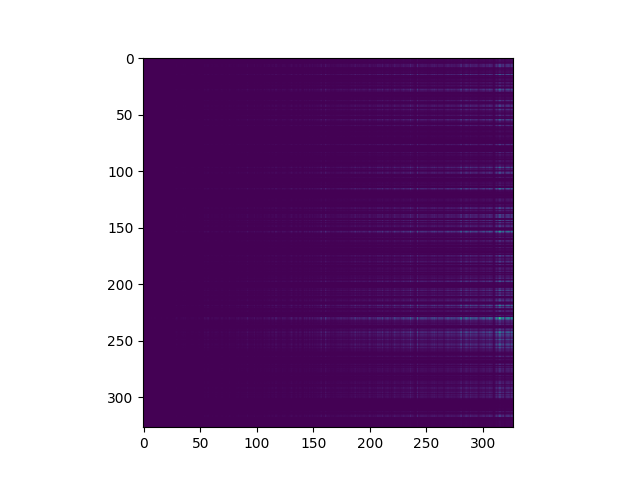

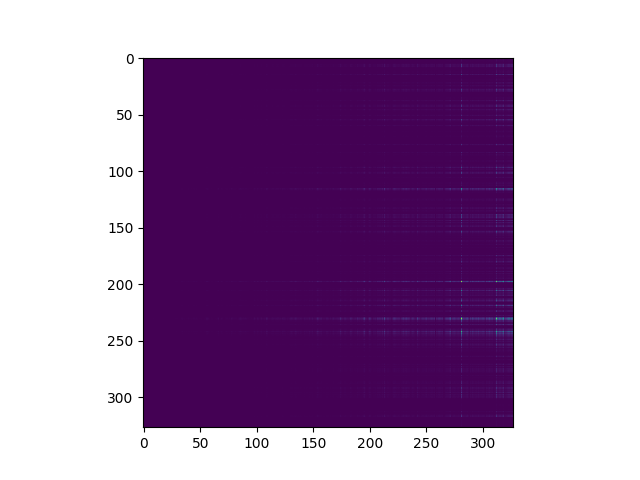

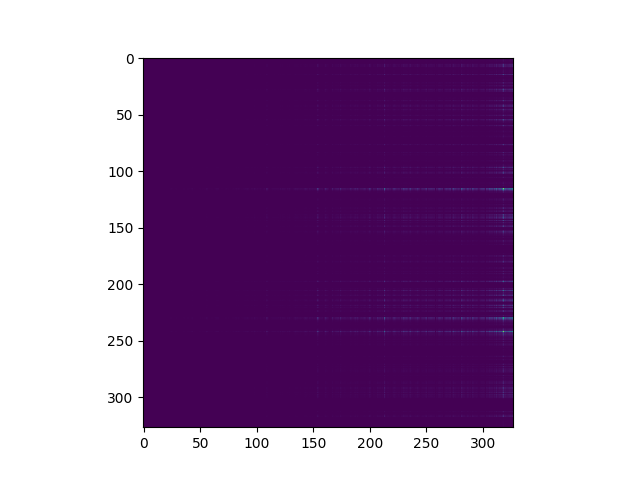

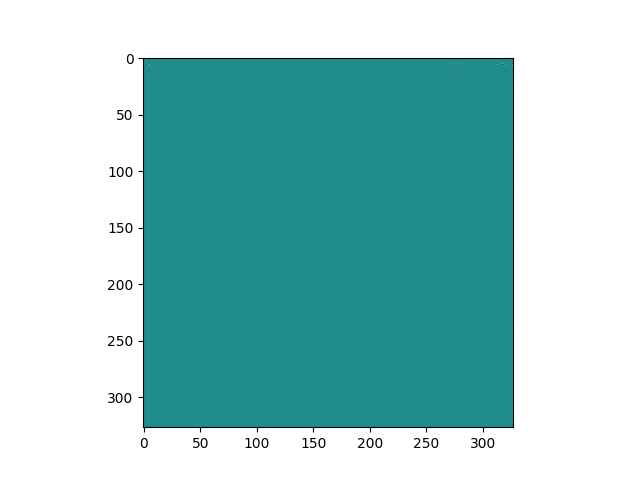

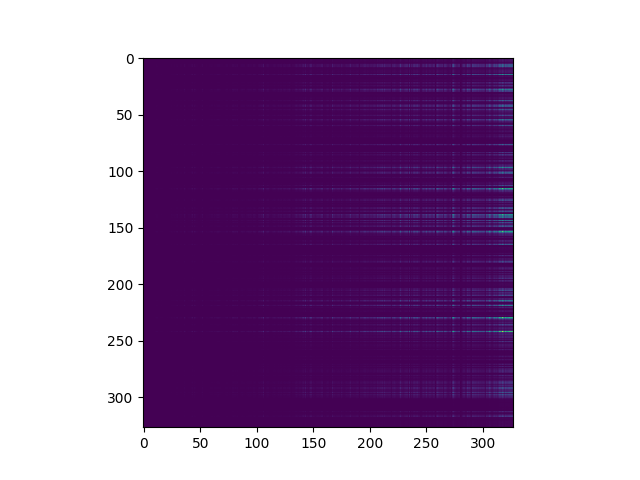

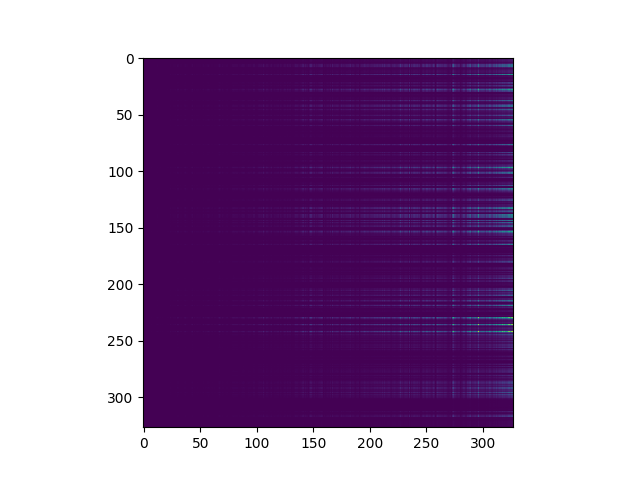

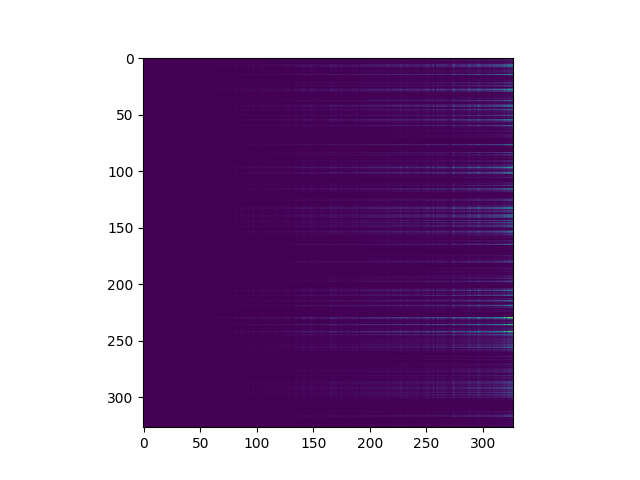

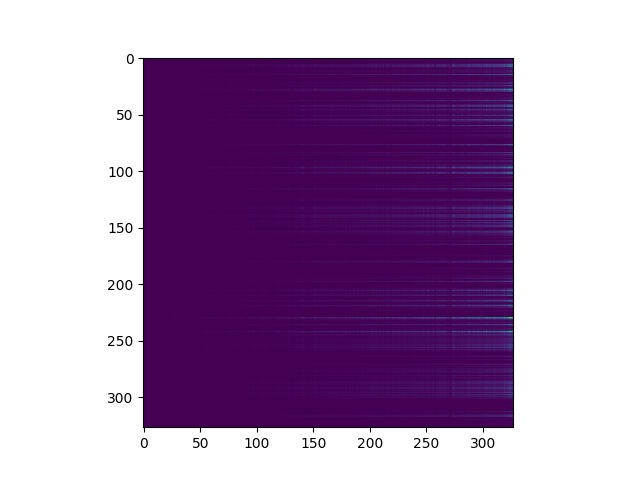

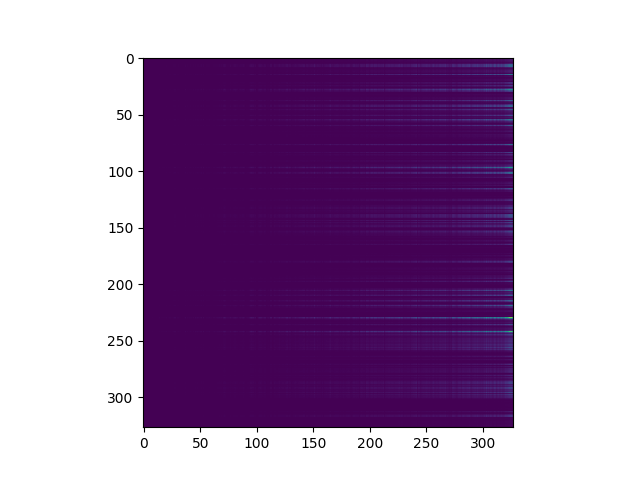

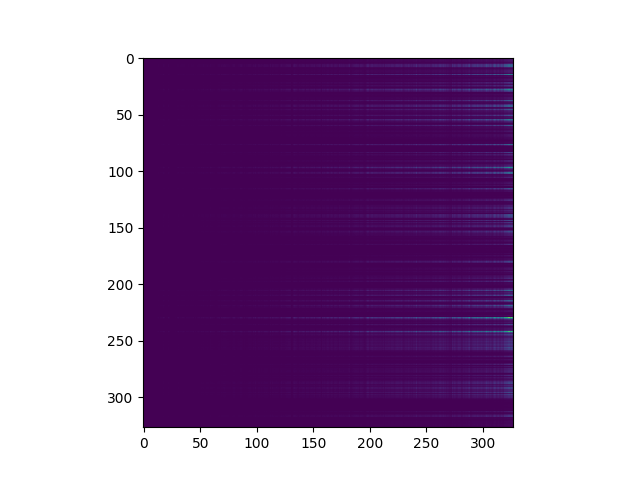

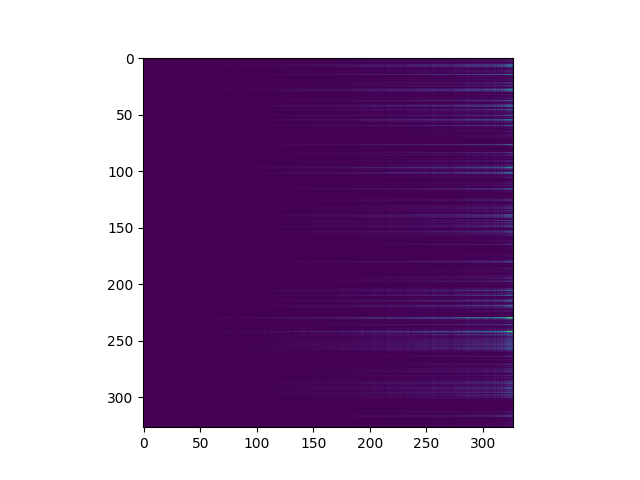

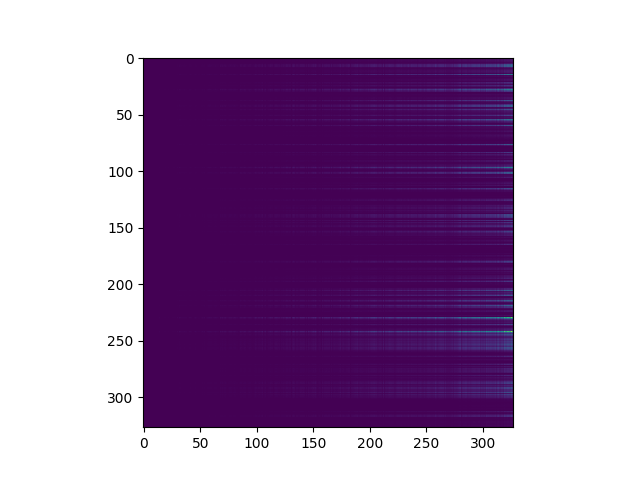

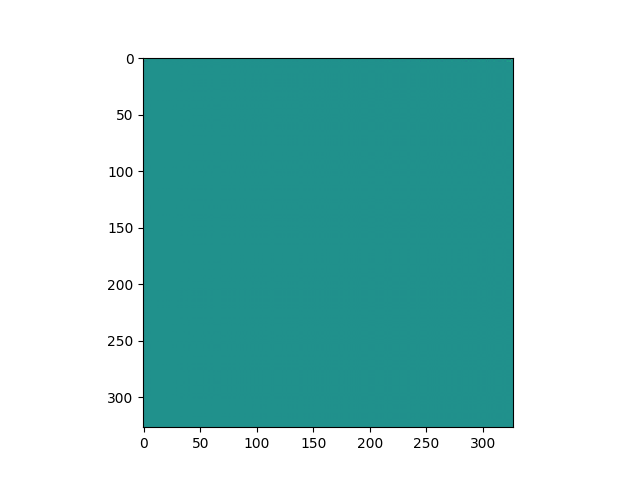

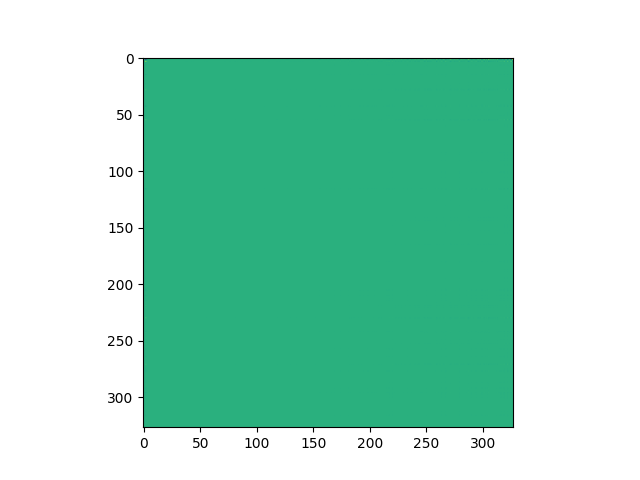

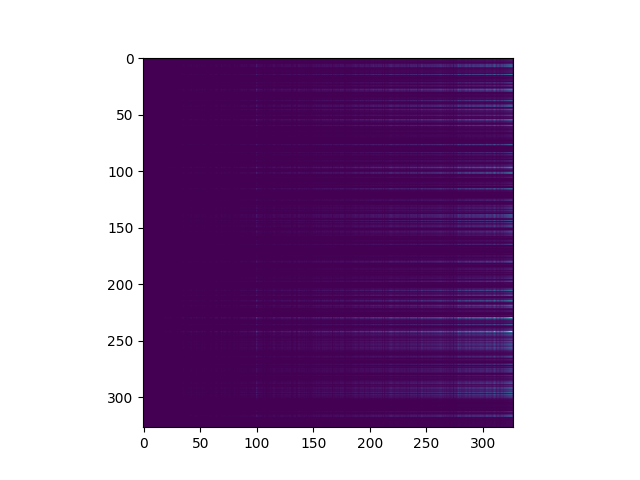

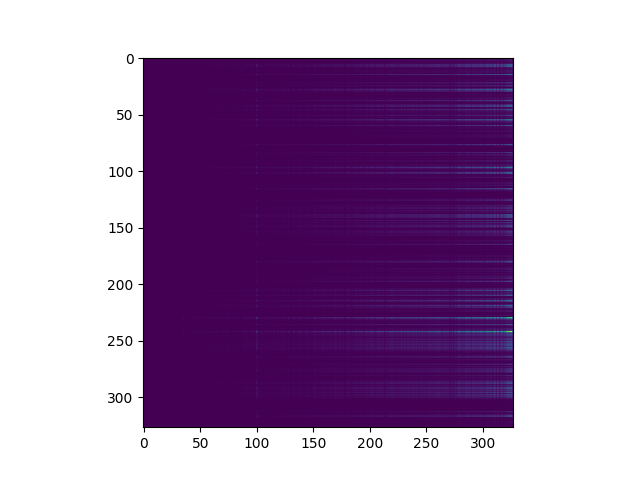

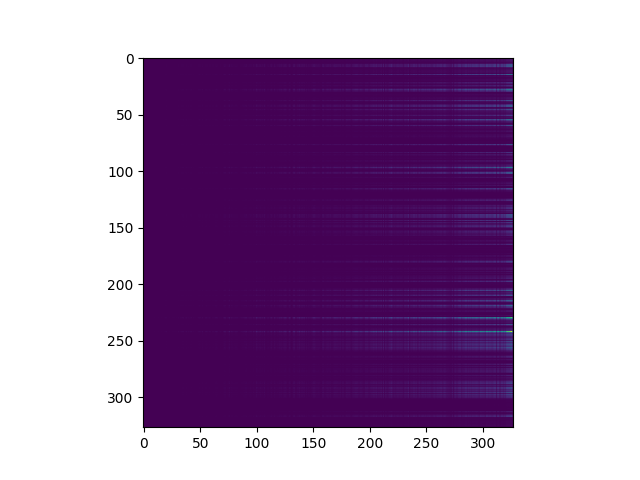

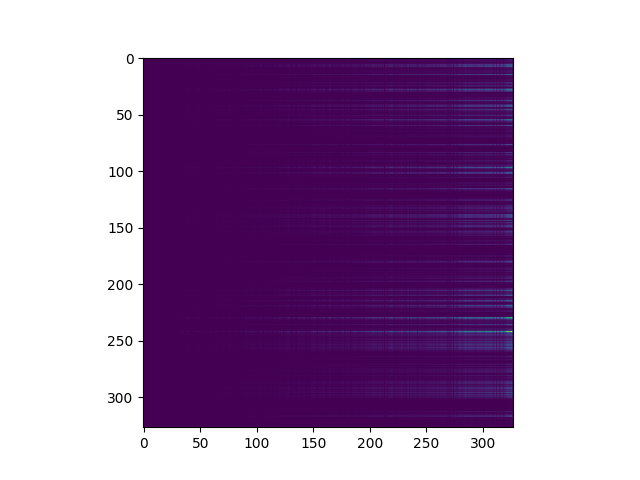

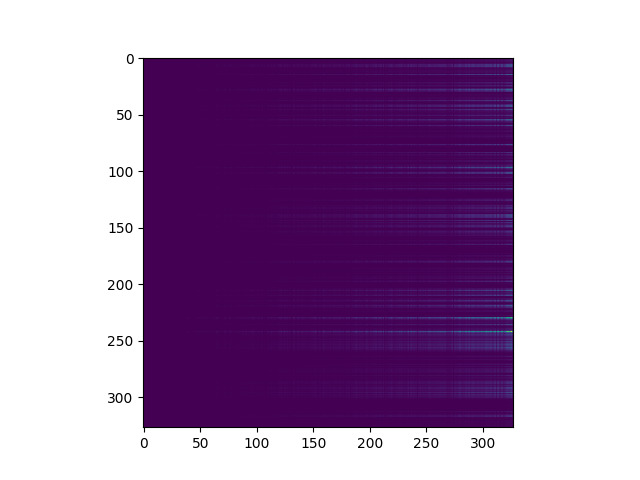

In [96]:
inverses = []
for i in range(35):
    v1 = avg1[:,i][:,None]
    v2 = avg2[:,i][:,None]
    iv2 = np.linalg.pinv(v2)
    trv = np.dot(v1, iv2)
    itrv = np.linalg.pinv(trv)
    inverses.append(itrv)
    plt.figure()
    plt.imshow(itrv)
inverses = np.array(inverses)
inverses.shape

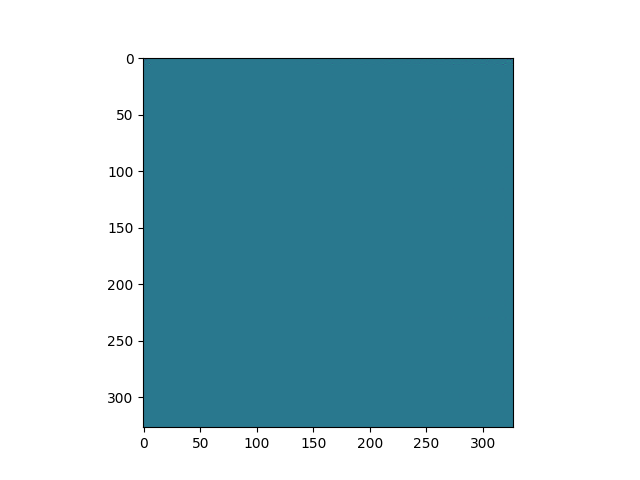

In [95]:
# plt.figure()
# plt.imshow(np.mean(inverses, axis=0))


In [75]:
m1 = avg1
m2 = avg2
im2 = np.linalg.pinv(m2)
trm = np.dot(m1, im2)
itrm = np.linalg.pinv(trm)
#m1.shape,m2.shape,im2.shape,trm.shape,itrm.shape
np.linalg.det(itrm)

0.0

In [10]:
transform = np.dot(iavg1, avg2)

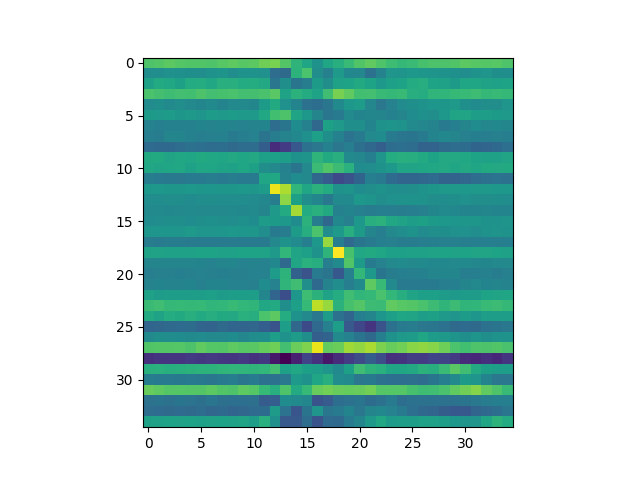

In [25]:
plt.figure()
plt.imshow(transform)

In [35]:
tr2 = np.linalg.inv(transform)

In [39]:
np.sum(avg2), np.sum(avg1), np.sum(transform)

(61.58818855932163, 54.082005898700395, 41.13776814540406)

In [40]:
v1 = avg1[0]

In [41]:
v1.shape

(35,)